- 컨볼루션 신경망은 딥러닝에서 가장 성공한 모델
- 자율주행, 딥드림, 영상 주석, 병변부위 찾기

##### 컨볼루션 연산
- 특징 추출 또는 신호변환에 이용
- 사용장(파란부분)과 커널의 선형 결합식
- z는 입력신호, u는 커널, h는 커널의 크기

In [3]:
from IPython import display
display.Image('./img/025.jpg', width = 500, height = 500)

In [ ]:
display.Image('./img/026.jpg', width = 500, height = 500)

In [ ]:
display.Image('./img/027.jpg', width = 500, height = 500)

#### 컨볼루션 특징
- 커널에 따라서 특징 맵을 추출해 줌 : 수평엣지 수직엣지
- 원본영상과 같은 크기의 특징 맵 생성
- 원본영상 자체에 연산을 적용하기에 정보손실이 없음

1. 표준컨볼루션에 몇가지 아이디어를 추가
2. 특징 맵이 작아지는 문제해결 덧대기
3. 영상크기를 축소 할 수 잇는 보폭(k로 설정하면 1/k로 줄어듦)
4. bias를 추가

In [25]:
display.Image('./img/029.jpg', width = 500, height = 500)

- 컨볼루션층과 폴링층 : 다중 커널

---

In [ ]:
# 폴링층
# 최대 폴링은 커널 안에 있는 촤소중에 최대값을 취함(평균폴링은 평균)
# 특징맵에 있는 지나친 상세함을 줄여서 요약 통계량을 추출
# 보폭을 s로 하면 특징 맵은 s배 만큼 줄어듦

display.Image('./img/030.jpg', width = 500, height = 500)

In [ ]:
# 컨볼루션 신경망은 약어를 이용해서 설계
# c p c p c fc fc
display.Image('./img/031.jpg', width = 500, height = 500)

In [ ]:
display.Image('./img/032.jpg', width = 500, height = 500)

In [47]:
# LeNet-5 로 MNIST인식
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [49]:
# load dataset
(x_train, y_train),(x_test,y_test) = mnist.load_data()

# 차수 변경 & 표준화
x_train = x_train.reshape(-1,28,28,1).astype(np.float32)/255.0
x_test = x_test.reshape(-1,28,28,1).astype(np.float32)/255.0

# one hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [52]:
# LeNet-5 신경망 모델 설계
cnn = Sequential()
cnn.add(Conv2D(6,(5,5), padding = 'same', activation='relu',input_shape = (28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(16,(5,5), padding = 'same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(120,(5,5), padding = 'same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(84,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

In [55]:
# 학습
cnn.compile(loss = tf.keras.losses.categorical_crossentropy, optimizer = Adam(), metrics = ['accuracy'])
hist = cnn.fit(x_train,y_train, batch_size=128, epochs = 30, validation_data=(x_test,y_test), verbose = 2)

Epoch 1/30
469/469 - 17s - loss: 0.2640 - accuracy: 0.9190 - val_loss: 0.0682 - val_accuracy: 0.9781 - 17s/epoch - 37ms/step
Epoch 2/30
469/469 - 17s - loss: 0.0691 - accuracy: 0.9782 - val_loss: 0.0599 - val_accuracy: 0.9792 - 17s/epoch - 36ms/step
Epoch 3/30
469/469 - 16s - loss: 0.0445 - accuracy: 0.9861 - val_loss: 0.0356 - val_accuracy: 0.9879 - 16s/epoch - 34ms/step
Epoch 4/30
469/469 - 16s - loss: 0.0350 - accuracy: 0.9890 - val_loss: 0.0452 - val_accuracy: 0.9859 - 16s/epoch - 34ms/step
Epoch 5/30
469/469 - 16s - loss: 0.0278 - accuracy: 0.9911 - val_loss: 0.0337 - val_accuracy: 0.9885 - 16s/epoch - 34ms/step
Epoch 6/30
469/469 - 16s - loss: 0.0228 - accuracy: 0.9927 - val_loss: 0.0299 - val_accuracy: 0.9905 - 16s/epoch - 34ms/step
Epoch 7/30
469/469 - 16s - loss: 0.0179 - accuracy: 0.9945 - val_loss: 0.0315 - val_accuracy: 0.9893 - 16s/epoch - 34ms/step
Epoch 8/30
469/469 - 16s - loss: 0.0173 - accuracy: 0.9942 - val_loss: 0.0375 - val_accuracy: 0.9874 - 16s/epoch - 34ms/step


In [57]:
# 신경망 모델 정확률 평가
res = cnn.evaluate(x_test,y_test)
res

313/313 [==============================] - 1s 3ms/step - loss: 0.0377 - accuracy: 0.9920


[0.03767770528793335, 0.9919999837875366]

<AxesSubplot:>

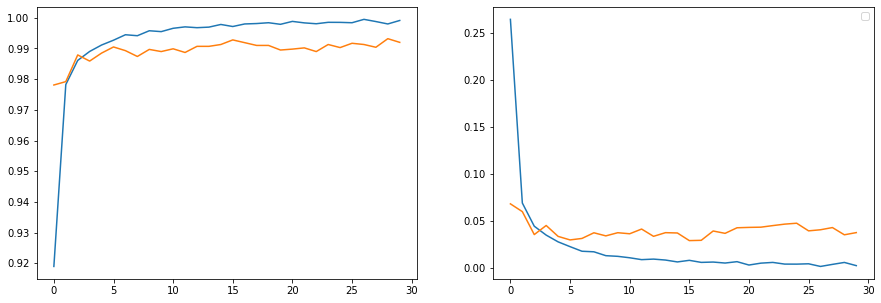

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.lineplot(data = hist.history['accuracy'], ax=ax[0])
sns.lineplot(data = hist.history['val_accuracy'], ax=ax[0])
plt.legend(['accuracy', 'val_accuracy'])
sns.lineplot(data = hist.history['loss'], ax=ax[1])
sns.lineplot(data = hist.history['val_loss'], ax=ax[1])


In [ ]:
# 위의 컨볼루션 기법에서 좀 더 유연한 구조 - colab